In [ ]:
# Обучающий набор
1.0 3.0 1,
3.0 1.0 0,
2.0 2.0 1,
4.0 1.0 0,
2.0 4.0 1,
4.5 1.0 0,
3.0 2.5 1,
5.0 2.0 0

# Тестовый набор
4.0 3.0,
2.5 2.5,
3.6 1.5,
5.0 1.5

Пожалуйста, введите данные обучения：1.0 3.0 1, 3.0 1.0 0, 2.0 2.0 1, 4.0 1.0 0, 2.0 4.0 1, 4.5 1.0 0, 3.0 2.5 1, 5.0 2.0 0
0.5556423611111111
Пожалуйста, введите тестовые данные：4.0 3.0, 2.5 2.5, 3.6 1.5, 5.0 1.5
1
1
0
0
slope=0.5556423611111111
координата： 6 3.333854166666667
s1= 25.9984375
s2= 10.0015625
доля= 2.5994375878768943


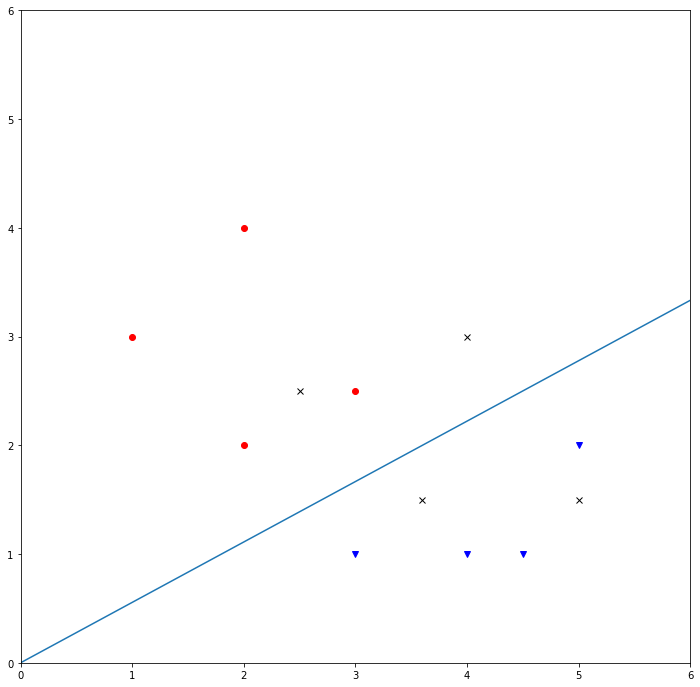

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

get = input("Пожалуйста, введите данные обучения：")
get = get.split(',')
train_data = []
x1 = []
y1 = []
x0 = []
y0 = []
for each in get:
    train_data.append(np.fromstring(each, dtype=float, sep=' '))
for each in train_data:
    if each[2] == 1:
        x1.append(each[0])
        y1.append(each[1])
    else:
        x0.append(each[0])
        y0.append(each[1])

np.random.seed(np.random.randint(0, 10000, size=1, dtype=int))
order1 = np.random.permutation(len(x1))
order0 = np.random.permutation(len(x0))

slope = 1.0
adjust = 0.0
learn = 0.5
for i in range(len(x1)):
    slope += (y1[order1[i]] - slope*x1[order1[i]] + adjust)/x1[order1[i]]*learn
    slope += (y0[order0[i]] - slope*x0[order0[i]] - adjust)/x0[order0[i]]*learn
print(slope)

get = input("Пожалуйста, введите тестовые данные：")
get = get.split(',')
test_data = []
x2 = []
y2 = []
for i in get:
    test_data.append(np.fromstring(i, dtype=float, sep=' '))
for i in test_data:
    x2.append(i[0])
    y2.append(i[1])
for i in range(len(x2)):
    if x2[i]*slope > y2[i]:
        print(0)
    else:
        print(1)

x = np.array(range(7))
y = []
for i in x:
    y.append(slope*i)
plt.figure(figsize=(12, 12))
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.plot(x, y, linestyle='-')
plt.plot(x1, y1, 'o', color='red')
plt.plot(x0, y0, 'v', color='blue')
plt.plot(x2, y2, 'x', color='black')

s = 'slope=' + repr(slope)
print (s)

   
if (slope>1):
    e1=6/slope
    e2=6
    x=e1
    y=e2
    print('координата：',e1,e2)
elif (slope<1):
    f1=6
    f2=6*slope
    x=f1
    y=f2
    print('координата：',f1,f2)
else:
    x=6
    y=6
    print(6,6)
   



def coss_multi(v1, v2):
  
    return v1[0]*v2[1] - v1[1]*v2[0]
 
 
def polygon_area(polygon):
    
    n = len(polygon)
 
    if n < 3:
        return 0
 
    vectors = np.zeros((n, 2))
    for i in range(0, n):
        vectors[i, :] = polygon[i, :] - polygon[0, :]
 
    area = 0
    for i in range(1, n):
        area = area + coss_multi(vectors[i-1, :], vectors[i, :]) / 2
 
    return area



if __name__ == "__main__":
 
    polygon1 = np.array([[x, y],
                         [6, 6],
                         [0, 6],
                         [0, 0]])
    print('s1=',polygon_area(polygon1))
    polygon2 = np.array([[6, 0],
                         [x, y],
                         [0, 0],])
    print('s2=',polygon_area(polygon2))
  
    
p=polygon_area(polygon1)/polygon_area(polygon2)
print('доля=',p)